In [1]:
import numpy as np
import gwcosmo
import pickle
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
import gwcosmo.prior.priors as priors

In [3]:
# broken-power-law mass distribution in Finke et al
m_min = 2.2
m_max = 86.16
alpha_1 = 1.05
alpha_2 = 5.17
b_break = 0.41
#b_q = 0.28
beta = 1.
delta_m = 5

In [4]:
hyper_params_dict = {'alpha':alpha_1, 'alpha_2':alpha_2, 'beta':beta, 'mmin':m_min, 'mmax':m_max, 'b':b_break, 'delta_m':delta_m}

In [5]:
mass_dist = priors.mass_prior('BBH-broken-powerlaw', hyper_params_dict)

In [6]:
mass_dist.dist

{'mass_1': <gwcosmo.prior.custom_math_priors.SmoothedProb at 0x7fa71ee89a60>,
 'mass_2': <gwcosmo.prior.custom_math_priors.SmoothedProb at 0x7fa7197592e0>}

In [7]:
m1 = np.linspace(1,100,100)
m2 = np.linspace(1,100,100)

In [8]:
m1_dist = mass_dist.joint_prob(m1,m2)

Text(0.5, 1.0, 'broken-power-law')

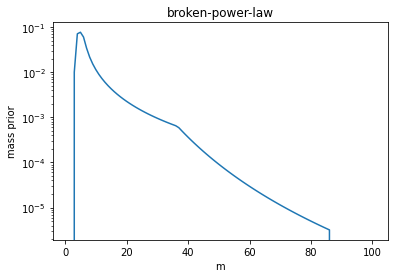

In [9]:
plt.semilogy(m1,m1_dist)
plt.xlabel('m')
plt.ylabel('mass prior')
plt.title('broken-power-law')

In [10]:
# power-law-gaussian mass distribution in Iracogw paper
m_min = 4.59
m_max = 86.22
alpha = 2.63
beta = 1.26
mu_g = 33.07
sigma_g = 5.69
lambda_peak = 0.5
delta_m = 4.82

In [11]:
hyper_params_dict = {'alpha':alpha, 'beta':beta, 'mmin':m_min, 'mmax':m_max, 'mu_g':mu_g, 'sigma_g':sigma_g, 'lambda_peak':lambda_peak, 'delta_m':delta_m}

In [12]:
mass_dist = priors.mass_prior('BBH-powerlaw-gaussian', hyper_params_dict)

In [13]:
m1_dist = mass_dist.joint_prob(m1,m2)

Text(0.5, 1.0, 'power-law-Gaussian')

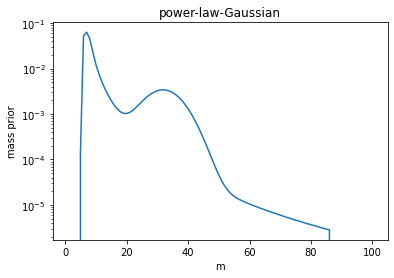

In [14]:
plt.semilogy(m1,m1_dist)
plt.xlabel('m')
plt.ylabel('mass prior')
plt.title('power-law-Gaussian')

In [15]:
file = '../pdet/BBH-powerlaw-gaussian_alpha_2.63_beta_1.26_Mmin_4.59_Mmax_86.22_mu_33.07_lambda_0.1_sigma_5.69_delta_4.82_Nsamps20000_full_waveform_snr_11.0_Xi0.p'
pdet_MG = pickle.load(open(file, 'rb'))

In [16]:
z_array = np.logspace(-4,0,100)
Xi0_arr = [0.3, 0.5, 1., 2., 10]

(0.0, 0.4)

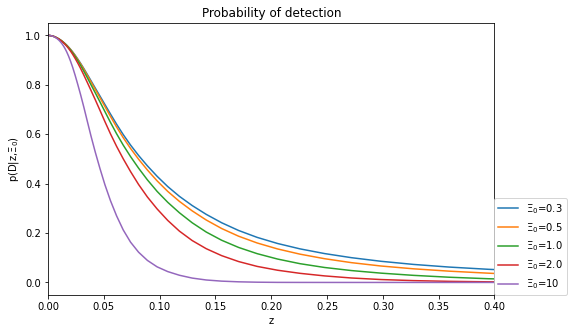

In [17]:
plt.figure(figsize=(8,5))
plt.title('Probability of detection')
for Xi0 in Xi0_arr:
    plt.plot(z_array,pdet_MG.pD_zparam_eval(z_array,Xi0),label=f'$\Xi_0$={Xi0}')#, linestyle='--')
plt.xlabel('z')
plt.ylabel(r'p(D|z,$\Xi_0$)')
plt.legend(loc=(1,0))
plt.xlim(0,0.4)

In [83]:
likelihood_GW150914_gaussian = np.load('../posterior/GW150914_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
# likelihood_GW151012_gaussian = np.load('../posterior/GW151012_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW151226_gaussian = np.load('../posterior/GW151226_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170104_gaussian = np.load('../posterior/GW170104_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170608_gaussian = np.load('../posterior/GW170608_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
# likelihood_GW170729_gaussian = np.load('../posterior/GW170729_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170809_gaussian = np.load('../posterior/GW170809_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170814_gaussian = np.load('../posterior/GW170814_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170818_gaussian = np.load('../posterior/GW170818_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170823_gaussian = np.load('../posterior/GW170823_Xi0_powerlaw_gaussian_likelihood_breakdown.npz', allow_pickle=True)


In [74]:
likelihood_GW151226_gaussian_mod = np.load('../posterior/GW151226_Xi0_powerlaw_gaussian_mod_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170608_gaussian_mod = np.load('../posterior/GW170608_Xi0_powerlaw_gaussian_mod_likelihood_breakdown.npz', allow_pickle=True)


In [88]:
likelihood_gaussian = {'GW150914':likelihood_GW150914_gaussian, 'GW151226':likelihood_GW151226_gaussian, 'GW170104':likelihood_GW170104_gaussian, 'GW170608':likelihood_GW170608_gaussian, 'GW170809':likelihood_GW170809_gaussian, 'GW170814':likelihood_GW170814_gaussian, 'GW170818':likelihood_GW170818_gaussian, 'GW170823':likelihood_GW170823_gaussian}

likelihood_gaussian_norm = {'GW150914':[], 'GW151226':[], 'GW170104':[], 'GW170608':[], 'GW170809':[], 'GW170814':[], 'GW170818':[], 'GW170823':[]}

Xi0_val = likelihood_GW150914_gaussian['arr_0'][0]


In [89]:
likelihood_gaussian_combine = 1

for event in likelihood_gaussian.keys():
    likelihood_gaussian_norm[event] = likelihood_gaussian[event]['arr_0'][1] / simps(likelihood_gaussian[event]['arr_0'][1], x=Xi0_val)
    likelihood_gaussian_combine *= likelihood_gaussian_norm[event]
    
likelihood_gaussian_combine_norm = likelihood_gaussian_combine / simps(likelihood_gaussian_combine, x=Xi0_val)


In [90]:
prior_log = gwcosmo.prior.priors.p_param(Xi0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=Xi0_val)

posterior_log_gaussian_combine = prior_log*likelihood_gaussian_combine

posterior_log_gaussian_combine_norm = posterior_log_gaussian_combine / simps(posterior_log_gaussian_combine, x=Xi0_val)


In [91]:
likelihood_gaussian_mod = {'GW150914':likelihood_GW150914_gaussian, 'GW151226':likelihood_GW151226_gaussian_mod, 'GW170104':likelihood_GW170104_gaussian, 'GW170608':likelihood_GW170608_gaussian_mod, 'GW170809':likelihood_GW170809_gaussian, 'GW170814':likelihood_GW170814_gaussian, 'GW170818':likelihood_GW170818_gaussian, 'GW170823':likelihood_GW170823_gaussian}

likelihood_gaussian_norm_mod = {'GW150914':[], 'GW151226':[], 'GW170104':[], 'GW170608':[], 'GW170809':[], 'GW170814':[], 'GW170818':[], 'GW170823':[]}


In [92]:
likelihood_gaussian_combine_mod = 1

for event in likelihood_gaussian_mod.keys():
    likelihood_gaussian_norm_mod[event] = likelihood_gaussian_mod[event]['arr_0'][1] / simps(likelihood_gaussian_mod[event]['arr_0'][1], x=Xi0_val)
    likelihood_gaussian_combine_mod *= likelihood_gaussian_norm_mod[event]
    
likelihood_gaussian_combine_norm_mod = likelihood_gaussian_combine_mod / simps(likelihood_gaussian_combine_mod, x=Xi0_val)


In [93]:
posterior_log_gaussian_combine_mod = prior_log*likelihood_gaussian_combine_mod

posterior_log_gaussian_combine_norm_mod = posterior_log_gaussian_combine_mod / simps(posterior_log_gaussian_combine_mod, x=Xi0_val)


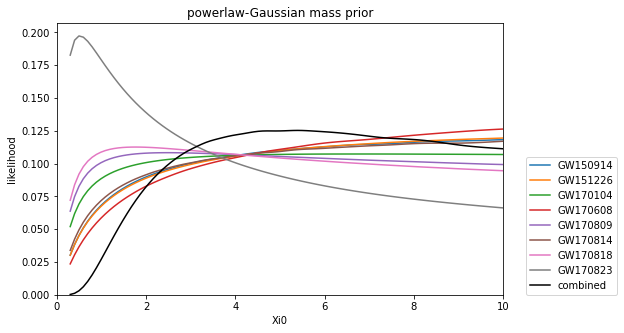

In [94]:
plt.figure(figsize=(8,5))
for event in likelihood_gaussian.keys():
    plt.plot(Xi0_val, likelihood_gaussian_norm[event], label=event)
plt.plot(Xi0_val, likelihood_gaussian_combine_norm, color='k', label='combined')
plt.xlabel('Xi0')
plt.ylabel('likelihood')
plt.title('powerlaw-Gaussian mass prior')
plt.xlim(0,10)
plt.ylim(bottom=0)
plt.legend(loc=(1.05,0))

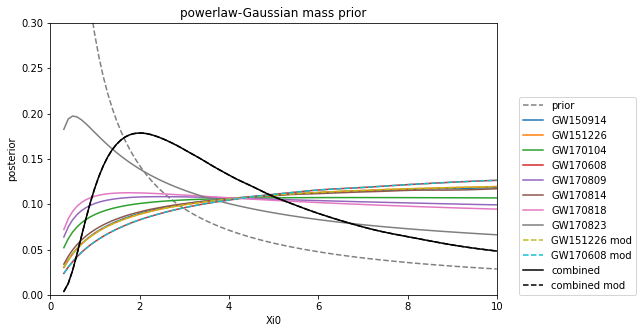

In [95]:
plt.figure(figsize=(8,5))
plt.plot(Xi0_val, prior_log_norm, linestyle='--', color='grey', label='prior')
for event in likelihood_gaussian.keys():
    plt.plot(Xi0_val, likelihood_gaussian_norm[event], label=event)
plt.plot(Xi0_val, likelihood_gaussian_norm_mod['GW151226'], label='GW151226 mod', linestyle='--')
plt.plot(Xi0_val, likelihood_gaussian_norm_mod['GW170608'], label='GW170608 mod', linestyle='--')
plt.plot(Xi0_val, posterior_log_gaussian_combine_norm, color='k', label='combined')
plt.plot(Xi0_val, posterior_log_gaussian_combine_norm_mod, color='k', label='combined mod', linestyle='--')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('powerlaw-Gaussian mass prior')
plt.xlim(0,10)
plt.ylim(0, 0.3)
plt.legend(loc=(1.05,0))

In [ ]:
likelihood_GW150914_broken = np.load('../posterior/GW150914_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW151012_broken = np.load('../posterior/GW151012_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW151226_broken = np.load('../posterior/GW151226_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170104_broken = np.load('../posterior/GW170104_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170608_broken = np.load('../posterior/GW170608_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170729_broken = np.load('../posterior/GW170729_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170809_broken = np.load('../posterior/GW170809_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170814_broken = np.load('../posterior/GW170814_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170818_broken = np.load('../posterior/GW170818_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)
likelihood_GW170823_broken = np.load('../posterior/GW170823_Xi0_broken_powerlaw_likelihood_breakdown.npz', allow_pickle=True)


In [ ]:
likelihood_broken = {'GW150914':likelihood_GW150914_broken, 'GW151226':likelihood_GW151226_broken, 'GW170104':likelihood_GW170104_broken, 'GW170608':likelihood_GW170608_broken, 'GW170809':likelihood_GW170809_broken, 'GW170814':likelihood_GW170814_broken}

likelihood_broken_norm = {'GW150914':[], 'GW151226':[], 'GW170104':[], 'GW170608':[], 'GW170809':[], 'GW170814':[]}

Xi0_val = likelihood_GW150914_broken['arr_0'][0]


In [ ]:
likelihood_broken_combine = 1

for event in likelihood_broken.keys():
    likelihood_broken_norm[event] = likelihood_broken[event]['arr_0'][1] / simps(likelihood_broken[event]['arr_0'][1], x=Xi0_val)
    likelihood_broken_combine *= likelihood_broken_norm[event]
    
likelihood_broken_combine_norm = likelihood_broken_combine / simps(likelihood_broken_combine, x=Xi0_val)


In [ ]:
prior_log = gwcosmo.prior.priors.p_param(Xi0_val,prior='log')
prior_log_norm = prior_log / simps(prior_log, x=Xi0_val)

posterior_log_broken_combine = prior_log*likelihood_broken_combine

posterior_log_broken_combine_norm = posterior_log_broken_combine / simps(posterior_log_broken_combine, x=Xi0_val)


In [ ]:
plt.figure(figsize=(8,5))
for event in likelihood_broken.keys():
    plt.plot(Xi0_val, likelihood_broken_norm[event], label=event)
plt.plot(Xi0_val, likelihood_broken_combine_norm, color='k', label='combined')
plt.xlabel('Xi0')
plt.ylabel('likelihood')
plt.title('broken-powerlaw mass prior')
plt.xlim(0,10)
plt.ylim(bottom=0)
plt.legend(loc=(1.05,0))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(Xi0_val, prior_log_norm, linestyle='--', color='grey', label='prior')
for event in likelihood_broken.keys():
    plt.plot(Xi0_val, likelihood_broken_norm[event], label=event)
plt.plot(Xi0_val, posterior_log_broken_combine_norm, color='k', label='combined')
plt.xlabel('Xi0')
plt.ylabel('posterior')
plt.title('broken-powerlaw mass prior')
plt.xlim(0,10)
plt.ylim(0, 0.6)
plt.legend(loc=(1.05,0))

In [99]:
cosmo = gwcosmo.utilities.modified_cosmology.fast_cosmology_MG

samples_GW150914 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW150914_GWTC-1.hdf5')
samples_GW151226 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW151226_GWTC-1.hdf5')
samples_GW170104 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW170104_GWTC-1.hdf5')
samples_GW170608 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW170608_GWTC-1.hdf5')
samples_GW170809 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW170809_GWTC-1.hdf5')
samples_GW170814 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW170814_GWTC-1.hdf5')
samples_GW170818 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW170818_GWTC-1.hdf5')
samples_GW170823 = gwcosmo.likelihood.posterior_samples.posterior_samples(cosmo, '../data/GW170823_GWTC-1.hdf5')


In [20]:
samples_GW150914.distance

array([446.66336016, 365.25394792, 479.06165456, ..., 456.31218486,
       576.72667035, 311.58609371])

In [21]:
z_samp_GW150914 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
z_samp_GW151226 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
z_samp_GW170104 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
z_samp_GW170608 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
z_samp_GW170809 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
z_samp_GW170814 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

m1s_GW150914 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m1s_GW151226 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m1s_GW170104 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m1s_GW170608 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m1s_GW170809 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m1s_GW170814 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

m2s_GW150914 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m2s_GW151226 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m2s_GW170104 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m2s_GW170608 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m2s_GW170809 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m2s_GW170814 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

In [97]:
z_samp_GW170818 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
z_samp_GW170823 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

m1s_GW170818 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m1s_GW170823 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

m2s_GW170818 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
m2s_GW170823 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

In [26]:
Xi0_test = [0.3, 0.5, 1, 2, 5]
Xi0_name = ['Xi0_0p3', 'Xi0_0p5', 'Xi0_1', 'Xi0_2', 'Xi0_5']

In [ ]:
for i in range(len(Xi0_test)):
    Xi0 = Xi0_test[i]
    Xi0_n = Xi0_name[i]
    
    z_samp_GW150914[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW150914.distance])
    z_samp_GW151226[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW151226.distance])
    z_samp_GW170104[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW170104.distance])
    z_samp_GW170608[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW170608.distance])
    z_samp_GW170809[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW170809.distance])
    z_samp_GW170814[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW170814.distance])


In [100]:
for i in range(len(Xi0_test)):
    Xi0 = Xi0_test[i]
    Xi0_n = Xi0_name[i]
    
    z_samp_GW170818[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW170818.distance])
    z_samp_GW170823[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in samples_GW170823.distance])


In [ ]:
z_samp_GW150914['Xi0_0p5']

In [ ]:
np.savez('z_samp_GW150914.npz',[z_samp_GW150914['Xi0_0p3'], z_samp_GW150914['Xi0_0p5'], z_samp_GW150914['Xi0_1'], z_samp_GW150914['Xi0_2'], z_samp_GW150914['Xi0_5']])
np.savez('z_samp_GW151226.npz',[z_samp_GW151226['Xi0_0p3'], z_samp_GW151226['Xi0_0p5'], z_samp_GW151226['Xi0_1'], z_samp_GW151226['Xi0_2'], z_samp_GW151226['Xi0_5']])
np.savez('z_samp_GW170104.npz',[z_samp_GW170104['Xi0_0p3'], z_samp_GW170104['Xi0_0p5'], z_samp_GW170104['Xi0_1'], z_samp_GW170104['Xi0_2'], z_samp_GW170104['Xi0_5']])
np.savez('z_samp_GW170608.npz',[z_samp_GW170608['Xi0_0p3'], z_samp_GW170608['Xi0_0p5'], z_samp_GW170608['Xi0_1'], z_samp_GW170608['Xi0_2'], z_samp_GW170608['Xi0_5']])
np.savez('z_samp_GW170809.npz',[z_samp_GW170809['Xi0_0p3'], z_samp_GW170809['Xi0_0p5'], z_samp_GW170809['Xi0_1'], z_samp_GW170809['Xi0_2'], z_samp_GW170809['Xi0_5']])
np.savez('z_samp_GW170814.npz',[z_samp_GW170814['Xi0_0p3'], z_samp_GW170814['Xi0_0p5'], z_samp_GW170814['Xi0_1'], z_samp_GW170814['Xi0_2'], z_samp_GW170814['Xi0_5']])


In [101]:
np.savez('z_samp_GW170818.npz',[z_samp_GW170818['Xi0_0p3'], z_samp_GW170818['Xi0_0p5'], z_samp_GW170818['Xi0_1'], z_samp_GW170818['Xi0_2'], z_samp_GW170818['Xi0_5']])
np.savez('z_samp_GW170823.npz',[z_samp_GW170823['Xi0_0p3'], z_samp_GW170823['Xi0_0p5'], z_samp_GW170823['Xi0_1'], z_samp_GW170823['Xi0_2'], z_samp_GW170823['Xi0_5']])


In [109]:
z_GW150914_file = np.load('z_samp_GW150914.npz')
z_GW151226_file = np.load('z_samp_GW151226.npz')
z_GW170104_file = np.load('z_samp_GW170104.npz')
z_GW170608_file = np.load('z_samp_GW170608.npz')
z_GW170809_file = np.load('z_samp_GW170809.npz')
z_GW170814_file = np.load('z_samp_GW170814.npz')
z_GW170818_file = np.load('z_samp_GW170818.npz')
z_GW170823_file = np.load('z_samp_GW170823.npz')

In [33]:
z_GW150914_file.files

['arr_0']

In [110]:
for i in range(len(Xi0_test)):
    Xi0_n = Xi0_name[i]
    z_samp_GW150914[Xi0_n] = z_GW150914_file['arr_0'][i]
    z_samp_GW151226[Xi0_n] = z_GW151226_file['arr_0'][i]
    z_samp_GW170104[Xi0_n] = z_GW170104_file['arr_0'][i]
    z_samp_GW170608[Xi0_n] = z_GW170608_file['arr_0'][i]
    z_samp_GW170809[Xi0_n] = z_GW170809_file['arr_0'][i]
    z_samp_GW170814[Xi0_n] = z_GW170814_file['arr_0'][i]
    z_samp_GW170818[Xi0_n] = z_GW170818_file['arr_0'][i]
    z_samp_GW170823[Xi0_n] = z_GW170823_file['arr_0'][i]

In [111]:
for i in range(len(Xi0_test)):
    Xi0_n = Xi0_name[i]

    m1s_GW150914[Xi0_n] = samples_GW150914.mass_1 / (1+z_samp_GW150914[Xi0_n])
    m2s_GW150914[Xi0_n] = samples_GW150914.mass_2 / (1+z_samp_GW150914[Xi0_n])
    
    m1s_GW151226[Xi0_n] = samples_GW151226.mass_1 / (1+z_samp_GW151226[Xi0_n])
    m2s_GW151226[Xi0_n] = samples_GW151226.mass_2 / (1+z_samp_GW151226[Xi0_n])
    
    m1s_GW170104[Xi0_n] = samples_GW170104.mass_1 / (1+z_samp_GW170104[Xi0_n])
    m2s_GW170104[Xi0_n] = samples_GW170104.mass_2 / (1+z_samp_GW170104[Xi0_n])
    
    m1s_GW170608[Xi0_n] = samples_GW170608.mass_1 / (1+z_samp_GW170608[Xi0_n])
    m2s_GW170608[Xi0_n] = samples_GW170608.mass_2 / (1+z_samp_GW170608[Xi0_n])
    
    m1s_GW170809[Xi0_n] = samples_GW170809.mass_1 / (1+z_samp_GW170809[Xi0_n])
    m2s_GW170809[Xi0_n] = samples_GW170809.mass_2 / (1+z_samp_GW170809[Xi0_n])
    
    m1s_GW170814[Xi0_n] = samples_GW170814.mass_1 / (1+z_samp_GW170814[Xi0_n])
    m2s_GW170814[Xi0_n] = samples_GW170814.mass_2 / (1+z_samp_GW170814[Xi0_n])
    
    m1s_GW170818[Xi0_n] = samples_GW170818.mass_1 / (1+z_samp_GW170818[Xi0_n])
    m2s_GW170818[Xi0_n] = samples_GW170818.mass_2 / (1+z_samp_GW170818[Xi0_n])
    
    m1s_GW170823[Xi0_n] = samples_GW170823.mass_1 / (1+z_samp_GW170823[Xi0_n])
    m2s_GW170823[Xi0_n] = samples_GW170823.mass_2 / (1+z_samp_GW170823[Xi0_n])

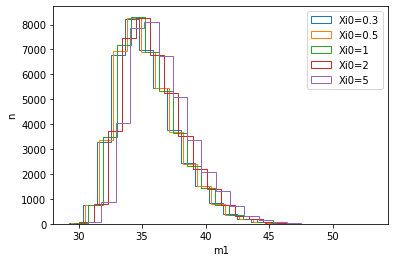

In [28]:
for i in range(len(Xi0_test)):
    Xi0 = Xi0_test[i]
    Xi0_n = Xi0_name[i]
    plt.hist(m1s_GW150914[Xi0_n], bins=20, histtype='step', label=f'Xi0={Xi0}')
plt.xlabel('m1')
plt.ylabel('n')
plt.legend()

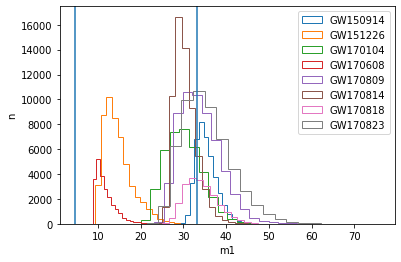

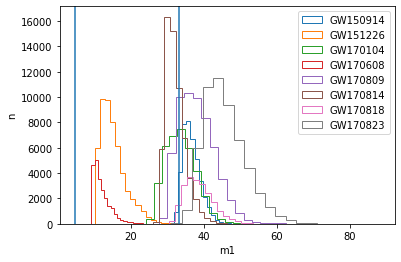

In [118]:
plt.figure()
plt.hist(m1s_GW150914['Xi0_0p3'], bins=20, histtype='step', label='GW150914')
plt.hist(m1s_GW151226['Xi0_0p3'], bins=20, histtype='step', label='GW151226')
plt.hist(m1s_GW170104['Xi0_0p3'], bins=20, histtype='step', label='GW170104')
plt.hist(m1s_GW170608['Xi0_0p3'], bins=20, histtype='step', label='GW170608')
plt.hist(m1s_GW170809['Xi0_0p3'], bins=20, histtype='step', label='GW170809')
plt.hist(m1s_GW170814['Xi0_0p3'], bins=20, histtype='step', label='GW170814')
plt.hist(m1s_GW170818['Xi0_0p3'], bins=20, histtype='step', label='GW170818')
plt.hist(m1s_GW170823['Xi0_0p3'], bins=20, histtype='step', label='GW170823')
plt.axvline(mu_g)
plt.axvline(m_min)
plt.xlabel('m1')
plt.ylabel('n')
plt.legend()

plt.figure()
plt.hist(m1s_GW150914['Xi0_5'], bins=20, histtype='step', label='GW150914')
plt.hist(m1s_GW151226['Xi0_5'], bins=20, histtype='step', label='GW151226')
plt.hist(m1s_GW170104['Xi0_5'], bins=20, histtype='step', label='GW170104')
plt.hist(m1s_GW170608['Xi0_5'], bins=20, histtype='step', label='GW170608')
plt.hist(m1s_GW170809['Xi0_5'], bins=20, histtype='step', label='GW170809')
plt.hist(m1s_GW170814['Xi0_5'], bins=20, histtype='step', label='GW170814')
plt.hist(m1s_GW170818['Xi0_5'], bins=20, histtype='step', label='GW170818')
plt.hist(m1s_GW170823['Xi0_5'], bins=20, histtype='step', label='GW170823')
plt.axvline(mu_g)
plt.axvline(m_min)
plt.xlabel('m1')
plt.ylabel('n')
plt.legend()

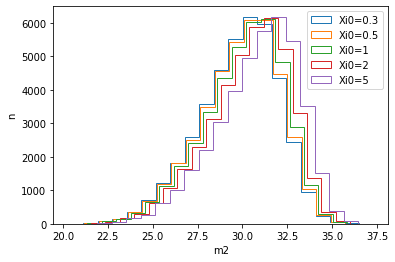

In [104]:
for i in range(len(Xi0_test)):
    Xi0 = Xi0_test[i]
    Xi0_n = Xi0_name[i]
    plt.hist(m2s_GW150914[Xi0_n], bins=20, histtype='step', label=f'Xi0={Xi0}')
plt.xlabel('m2')
plt.ylabel('n')
plt.legend()

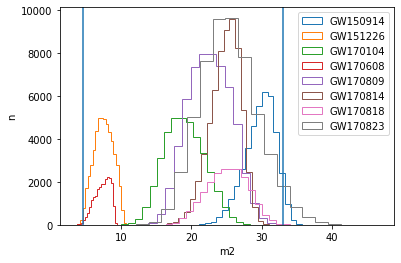

In [115]:
plt.hist(m2s_GW150914['Xi0_0p3'], bins=20, histtype='step', label='GW150914')
plt.hist(m2s_GW151226['Xi0_0p3'], bins=20, histtype='step', label='GW151226')
plt.hist(m2s_GW170104['Xi0_0p3'], bins=20, histtype='step', label='GW170104')
plt.hist(m2s_GW170608['Xi0_0p3'], bins=20, histtype='step', label='GW170608')
plt.hist(m2s_GW170809['Xi0_0p3'], bins=20, histtype='step', label='GW170809')
plt.hist(m2s_GW170814['Xi0_0p3'], bins=20, histtype='step', label='GW170814')
plt.hist(m2s_GW170818['Xi0_0p3'], bins=20, histtype='step', label='GW170818')
plt.hist(m2s_GW170823['Xi0_0p3'], bins=20, histtype='step', label='GW170823')
plt.axvline(mu_g)
plt.axvline(m_min)
plt.xlabel('m2')
plt.ylabel('n')
plt.legend()

In [39]:
min(m2s_GW170608['Xi0_0p3'])

3.7992192848078297

In [42]:
m_min = 4.59

print(np.where(m2s_GW151226['Xi0_0p3']<m_min)[0])
print(np.where(m2s_GW170608['Xi0_0p3']<m_min)[0])

[   89   173   421   813   914  1048  1103  1300  1339  1538  1637  1860
  2127  2145  2845  3010  3305  3385  3467  3515  3640  3646  4058  4140
  4577  5118  5171  5183  5260  5477  5694  5990  6107  6188  6261  6292
  6410  6998  7061  7086  7089  7105  7399  7433  7544  8292  8313  8334
  8624  8866  9050  9066  9149  9616  9632  9699  9940 10179 10340 10432
 10482 10788 10994 11137 11258 11372 11415 11476 11859 11867 11933 11948
 12046 12214 12314 12378 12456 12503 12546 12555 12990 13299 13461 13687
 13882 14259 14283 14423 14715 14841 15033 15172 15209 15591 15930 15949
 15984 16198 16246 16335 16407 16417 16941 17287 17394 17536 17602 17644
 17673 17863 17923 18012 18020 18093 18305 18837 18850 18898 19050 19144
 19227 19557 19710 19761 19813 20005 20337 20794 20868 20927 20955 20972
 21097 21138 21148 21632 21652 21776 21798 21823 21883 21938 22102 22140
 22247 22461 22643 22727 22813 22959 23011 23142 23212 23596 23608 23686
 23727 23760 23845 24037 24073 24101 24158 24206 24

In [50]:
index_GW151226 = np.where(m2s_GW151226['Xi0_0p3']>m_min)[0]
index_GW170608 = np.where(m2s_GW170608['Xi0_0p3']>m_min)[0]

array_GW151226 = [samples_GW151226.distance[index_GW151226], samples_GW151226.mass_1[index_GW151226], samples_GW151226.mass_2[index_GW151226], samples_GW151226.ra[index_GW151226], samples_GW151226.dec[index_GW151226]]
array_GW170608 = [samples_GW170608.distance[index_GW170608], samples_GW170608.mass_1[index_GW170608], samples_GW170608.mass_2[index_GW170608], samples_GW170608.ra[index_GW170608], samples_GW170608.dec[index_GW170608]]
print(np.transpose(array_GW170608))

[[3.99381925e+02 1.19457868e+01 7.99969008e+00 2.27404401e+00
  6.97261786e-01]
 [3.68981417e+02 1.10305191e+01 8.68700928e+00 2.05280638e+00
  1.17047075e+00]
 [3.94452178e+02 1.08047594e+01 8.83431976e+00 2.22480294e+00
  6.56110604e-01]
 ...
 [3.99187624e+02 1.00063796e+01 9.48232074e+00 2.13959584e+00
  4.74271135e-01]
 [2.39105050e+02 1.29217752e+01 7.42344775e+00 2.13212422e+00
  4.91890580e-01]
 [3.74004580e+02 1.00117041e+01 9.48250285e+00 2.07684246e+00
  3.37484659e-01]]


In [51]:
np.savetxt('samples_GW151226_mod.dat', np.transpose(array_GW151226), header='luminosity_distance\tmass_1\tmass_2\tra\tdec')
np.savetxt('samples_GW170608_mod.dat', np.transpose(array_GW170608), header='luminosity_distance\tmass_1\tmass_2\tra\tdec')


In [53]:
test = np.genfromtxt('samples_GW170608_mod.dat', names = True)
test_dist = np.array([var for var in test['luminosity_distance']])
print(test_dist)

[399.38192471 368.98141743 394.45217776 ... 399.1876239  239.10504973
 374.00458032]


In [54]:
test_z = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
test_m1 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}
test_m2 = {'Xi0_0p3':[], 'Xi0_0p5':[], 'Xi0_1':[], 'Xi0_2':[], 'Xi0_5':[]}

In [55]:
for i in range(len(Xi0_test)):
    Xi0 = Xi0_test[i]
    Xi0_n = Xi0_name[i]
    
    test_z[Xi0_n] = np.array([gwcosmo.utilities.modified_cosmology.z_dl_GW_Xi0(dist, Xi0, n=1.91, H0=67.27, Omega_m=0.3166) for dist in test_dist])


In [57]:
test_m2['Xi0_0p3'] = test['mass_2'] / (1+test_z['Xi0_0p3'])

In [64]:
test_bin = np.histogram(m2s_GW170608['Xi0_0p3'], bins=20)[1]

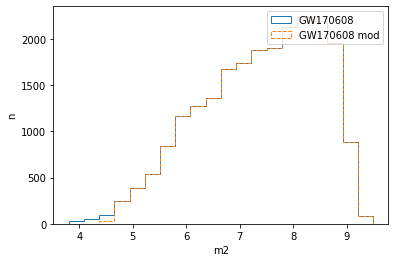

In [66]:
plt.hist(m2s_GW170608['Xi0_0p3'], bins=test_bin, histtype='step', label='GW170608')
plt.hist(test_m2['Xi0_0p3'], bins=test_bin, histtype='step', label='GW170608 mod', linestyle='--')
plt.xlabel('m2')
plt.ylabel('n')
plt.legend()

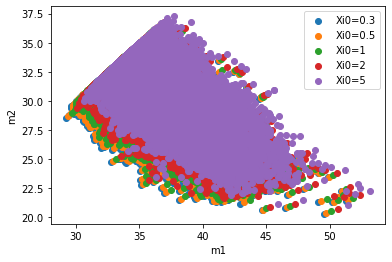

In [96]:
for i in range(len(Xi0_test)):
    Xi0 = Xi0_test[i]
    Xi0_n = Xi0_name[i]
    plt.scatter(m1s_GW150914[Xi0_n], m2s_GW150914[Xi0_n], label=f'Xi0={Xi0}')
plt.xlabel('m1')
plt.ylabel('m2')
plt.legend()